# Homework:

Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.

1) Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~$dx^n$; what is n? what is the optimal value for dx.

2) Repeat the exercise using the central difference scheme. Why this scheme is better?

3) Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

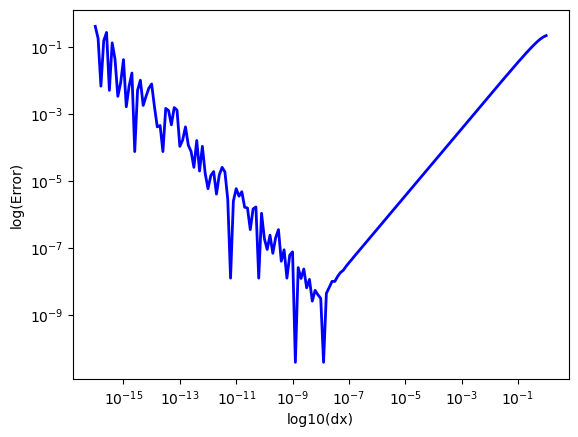

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def derifw(y, x, dx):
    return (y(x + dx) - y(x)) / dx


analytical_derivative = -np.sin(x)  # This is the analytical derivative of cos(x) at x
x = (np.pi) / 4

dxarr = []
yarr = []
for dx in 10**(np.arange(-16, 0.1, 0.1)):
    y = derifw(np.cos, x, dx)
    dxarr.append(dx)
    yarr.append(y)
    
plt.plot(dxarr, abs(yarr - analytical_derivative), 'b-', lw=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10(dx)')
plt.ylabel('log(Error)')

plt.show()



The truncation error for forward difference is $y''\times h/2$. n=1 so, the error term is proportional to dx

In [84]:
#lists to arrays 
dxarr = np.array(dxarr)
yarr = np.array(yarr)


errors = np.abs(yarr - analytical_derivative)

#index of the minimum error
min_error_index = np.argmin(errors)


optimal_dx = dxarr[min_error_index]

print("Optimal value for dx using fw:", optimal_dx)


Optimal value for dx using fw: 1.258925411794094e-09


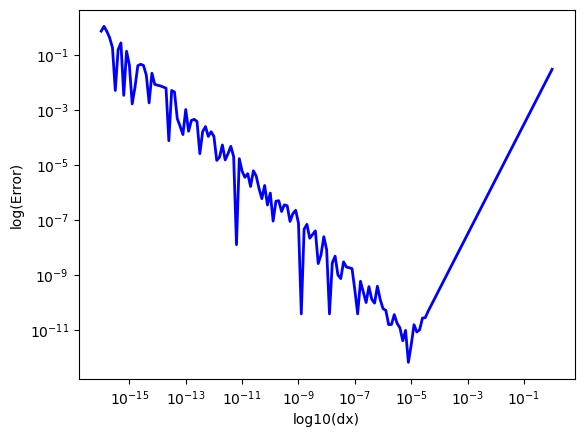

In [85]:
def dericd(y,x,dx):
    return (y(x+dx/2)-y(x-dx/2))/dx


x=(np.pi)/4
dxarr1=[]
yarr1=[]
for dx in 10**(np.arange(-16, 0.1, 0.1)):
    y1=dericd(np.cos,x,dx)
    dxarr1.append(dx)
    yarr1.append(y1)
    
plt.plot(dxarr1, abs(yarr1 - analytical_derivative), 'b-', lw=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log10(dx)')
plt.ylabel('log(Error)')

plt.show()

The truncation error for central difference is $y'''\times h^2/24$. So n=2. The central difference method is a second-order accurate method, whereas the forward difference method is first-order accurate. For a given step size dx, the error in the central difference method is proportional to dx^2 while in the forward difference method, the error is proportional to dx. Therefore, the central difference method provides a more accurate approximation of the derivative for the same step size.

In [86]:
#lists to arrays 
dxarr1 = np.array(dxarr1)
yarr1 = np.array(yarr1)


errors1 = np.abs(yarr1 - analytical_derivative)

#index of the minimum error
min_error_index1 = np.argmin(errors1)


optimal_dx1 = dxarr1[min_error_index1]

print("Optimal value for dx using cd:", optimal_dx1)

Optimal value for dx using cd: 7.943282347242107e-06


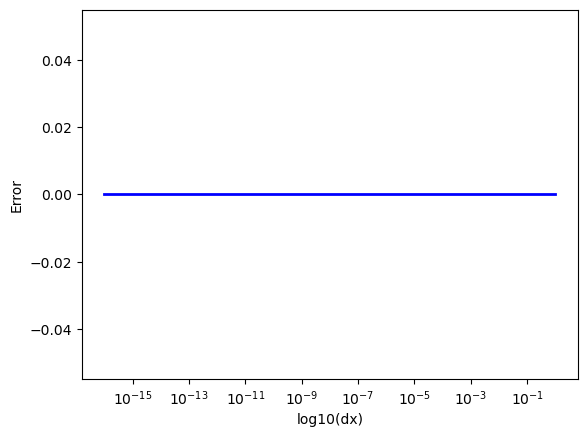

In [87]:
x=0
dxarr1=[]
yarr1=[]
for dx in 10**np.arange(-16, 0.1, 0.1):
    y1=dericd(np.cos,x,dx)
    dxarr1.append(dx)
    yarr1.append(y1)
    
plt.plot(dxarr1, abs(yarr1 - (-np.sin(x))), 'b-', lw=2)    
plt.xscale('log')
#plt.yscale('log')
plt.xlabel('log10(dx)')
plt.ylabel('Error')

plt.show()

As we know, The truncation error for central difference is $y'''\times h^2/24$, For this case y'''(0)= 0 , so this error will be zero for any value of h. Moreover, at x=0, the symmetry of the cosine function leads to an exact calculation of the derivative with the central difference method, resulting in negligible error regardless of the value of dx